# HATLAS-NGP master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, quick_checks

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20171103"

master_catalogue = Table.read("{}/master_catalogue_ngp{}.fits".format(OUT_DIR, SUFFIX))

## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(104, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(104, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


idx,Column,All nan,#Measurements,#Zeros,#Negative,Minimum value
0,merr_ap_decam_z,0.0,4942240.0,0.0,4711.0,-9632.18652344
1,ferr_ap_gpc1_g,0.0,3058210.0,1397.0,0.0,0.0
2,m_ap_gpc1_g,0.0,3058210.0,0.0,2.0,-0.37305700779
3,merr_ap_gpc1_g,0.0,3058210.0,1397.0,0.0,0.0
4,ferr_gpc1_g,0.0,3089817.0,3152.0,0.0,0.0
5,m_gpc1_g,0.0,3089817.0,0.0,9.0,-2.10953998566
6,merr_gpc1_g,0.0,3089817.0,3152.0,0.0,0.0
7,ferr_ap_gpc1_r,0.0,3198369.0,562.0,0.0,0.0
8,merr_ap_gpc1_r,0.0,3198369.0,562.0,0.0,0.0
9,ferr_gpc1_r,0.0,3207768.0,638.0,0.0,0.0


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

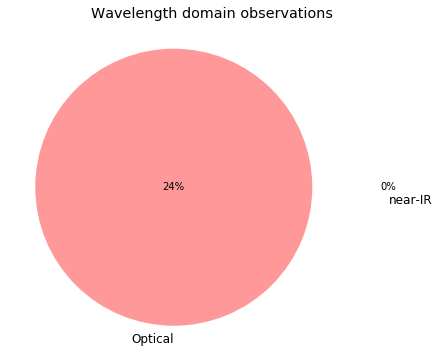

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn2.py:50: UserWarning: Both circles have zero area
  warnings.warn("Both circles have zero area")


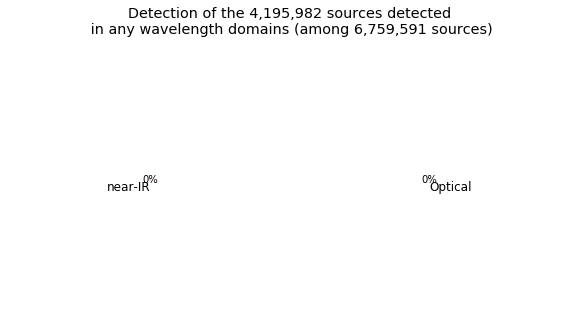

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = [          ]
g_bands = [           "GPC1 g", "90prime g"]
r_bands = [           "GPC1 r", "90prime r"]
i_bands = [           "GPC1 i"]
z_bands = ["DECam z", "GPC1 z", "Mosaic z"]
y_bands = [           "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


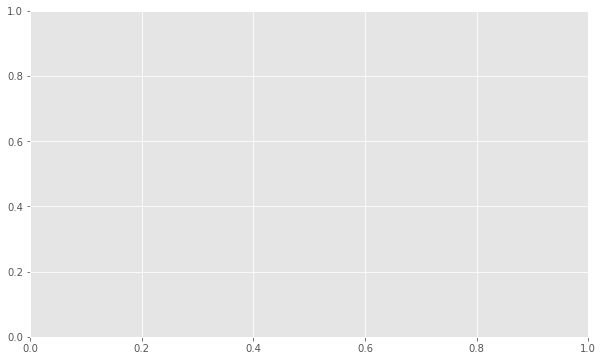

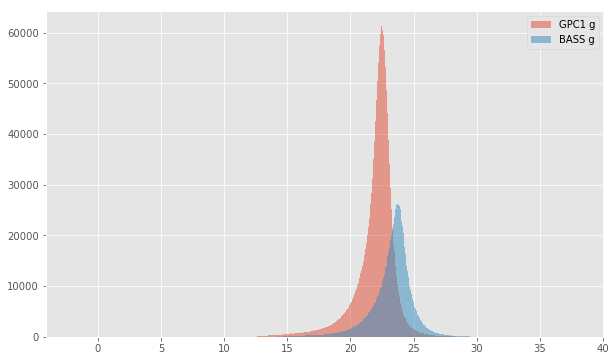

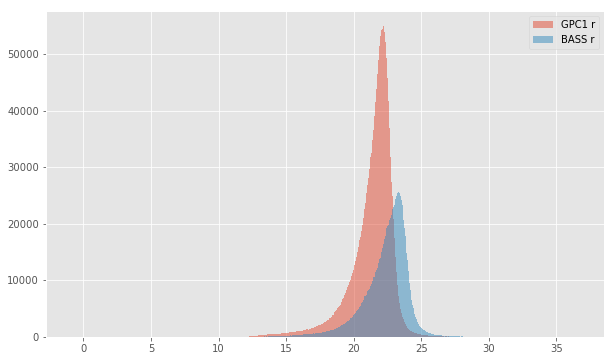

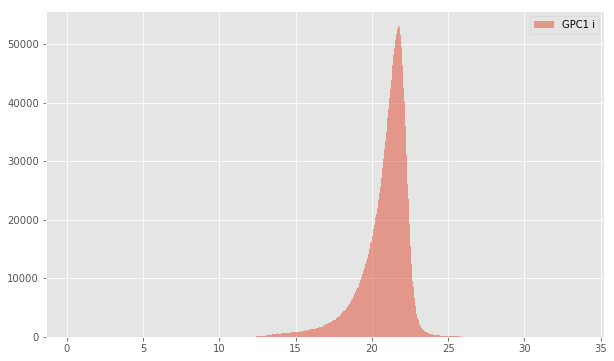

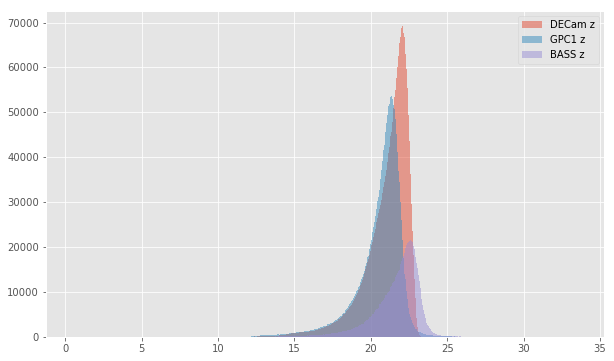

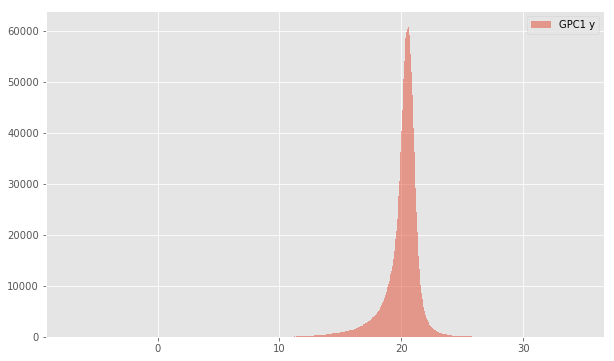

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

BASS g (aperture) - GPC1 g (aperture):
- Median: 0.16
- Median Absolute Deviation: 0.25
- 1% percentile: -1.8993983268737793
- 99% percentile: 3.54915212631226


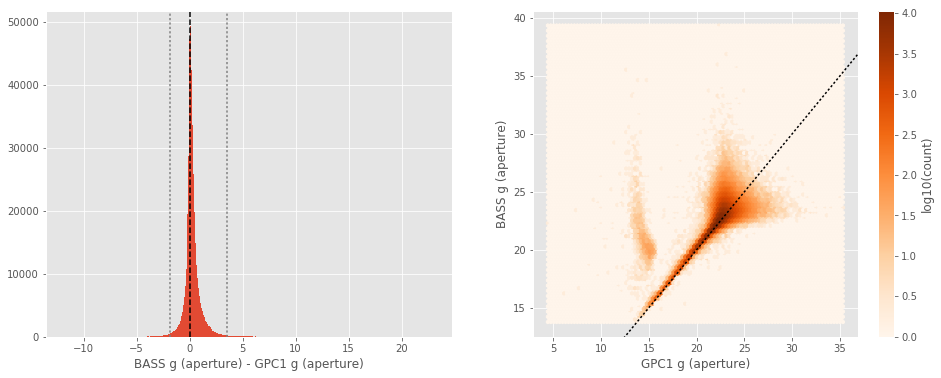

BASS g (total) - GPC1 g (total):
- Median: -0.00
- Median Absolute Deviation: 0.23
- 1% percentile: -1.5988301277160644
- 99% percentile: 2.9839715003967267


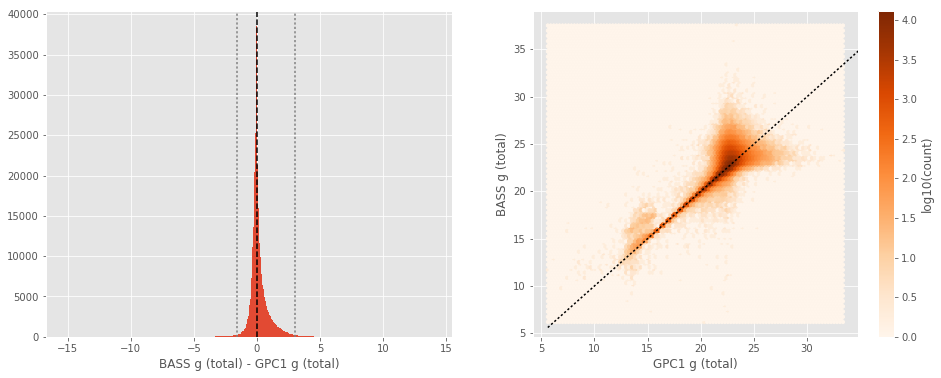

BASS r (aperture) - GPC1 r (aperture):
- Median: -0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3436206436157225
- 99% percentile: 2.164133319854683


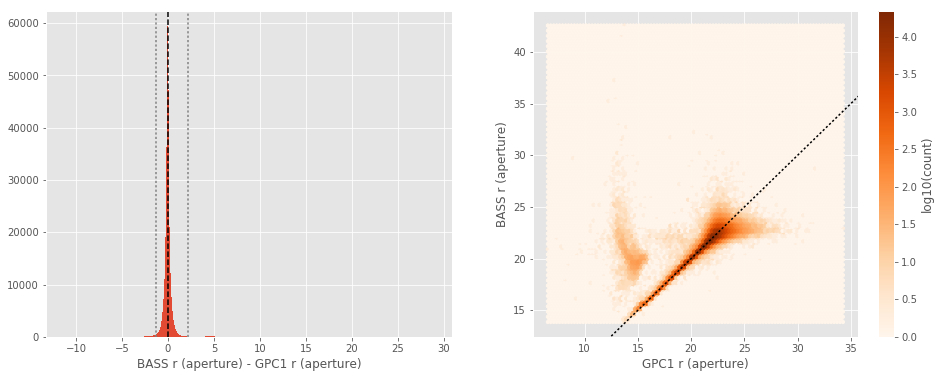

BASS r (total) - GPC1 r (total):
- Median: -0.18
- Median Absolute Deviation: 0.14
- 1% percentile: -1.291554069519043
- 99% percentile: 1.325196399688716


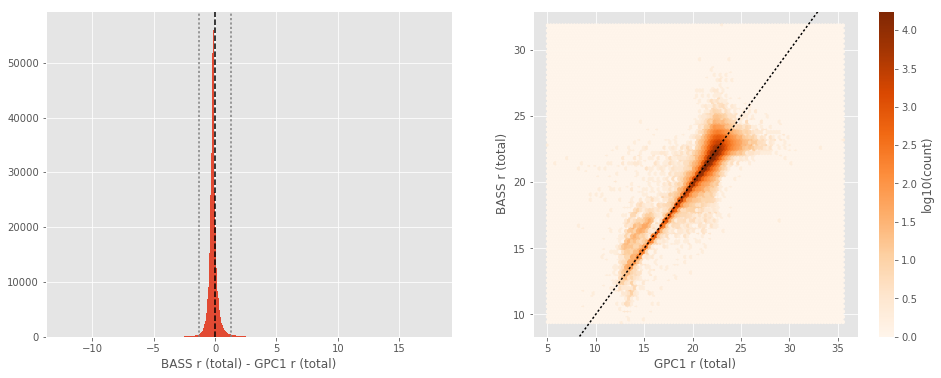

GPC1 z (aperture) - DECam z (aperture):
- Median: 0.15
- Median Absolute Deviation: 0.12
- 1% percentile: -1.3645053482055665
- 99% percentile: 1.171778297424316


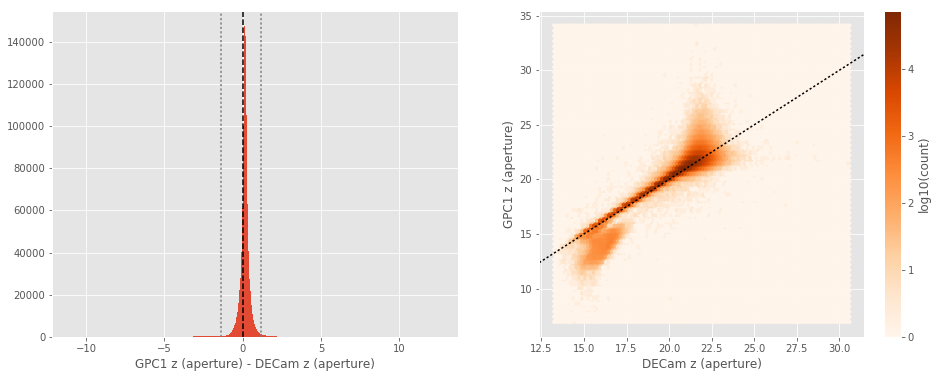

GPC1 z (total) - DECam z (total):
- Median: 0.26
- Median Absolute Deviation: 0.14
- 1% percentile: -0.7166573143005371
- 99% percentile: 1.356721229553223


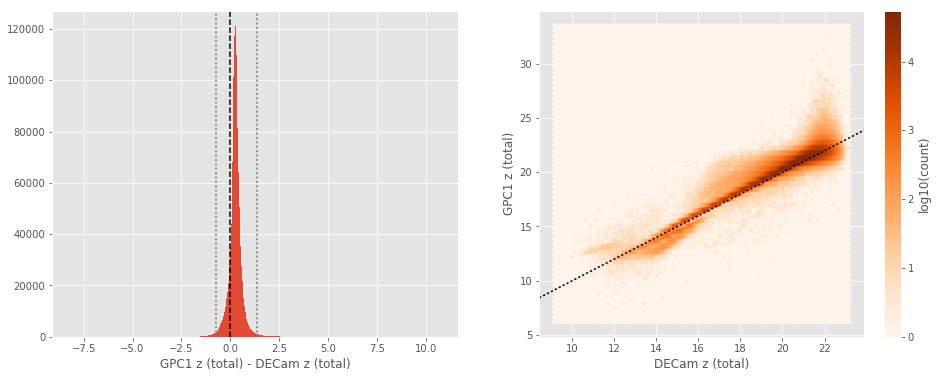

BASS z (aperture) - DECam z (aperture):
- Median: 0.01
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8405391693115234
- 99% percentile: 2.199215316772468


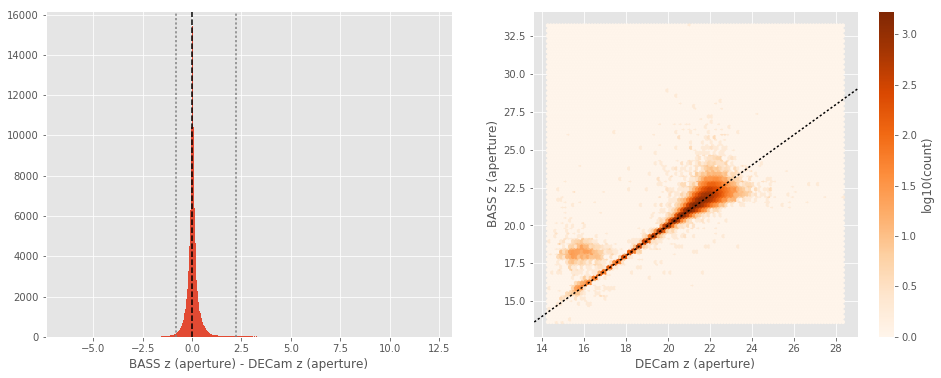

BASS z (total) - DECam z (total):
- Median: -0.01
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8669711303710937
- 99% percentile: 1.0804067993164062


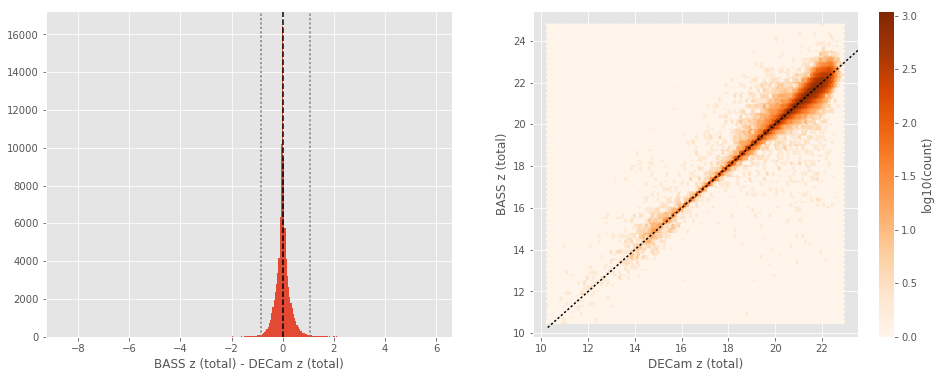

BASS z (aperture) - GPC1 z (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1134843826293945
- 99% percentile: 2.9018537998199463


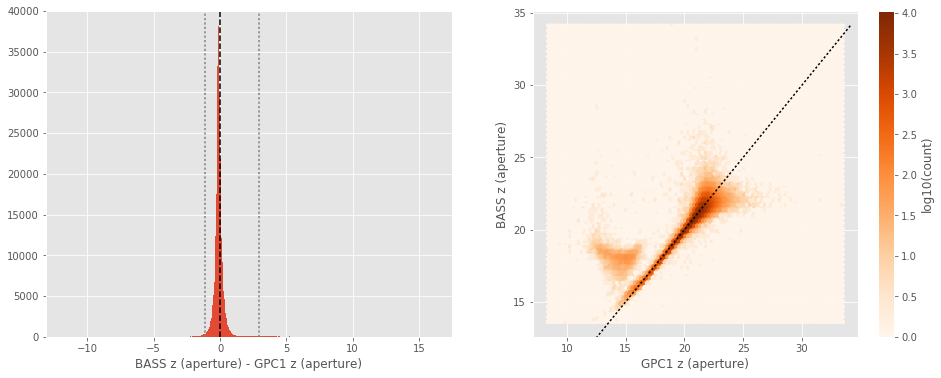

BASS z (total) - GPC1 z (total):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2559052276611329
- 99% percentile: 0.8657968139648397


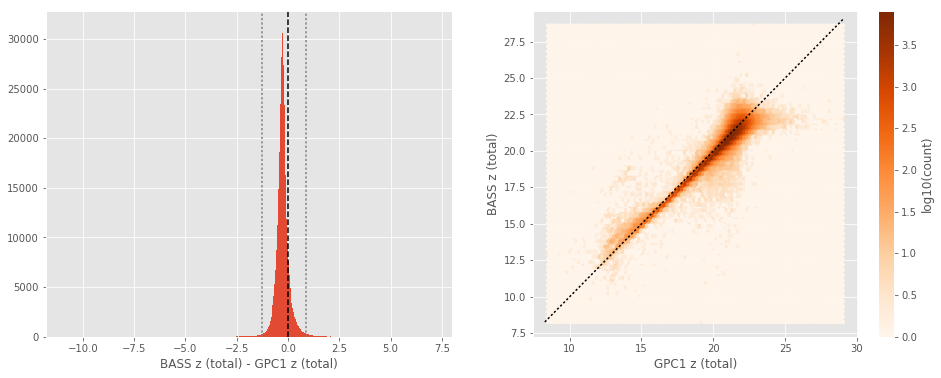

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to 2MASS to compare its magnitudes to 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [12]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [13]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_HATLAS-NGP.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.05
- Median Absolute Deviation: 0.07
- 1% percentile: -0.8737602805234732
- 99% percentile: 0.7164782998750846


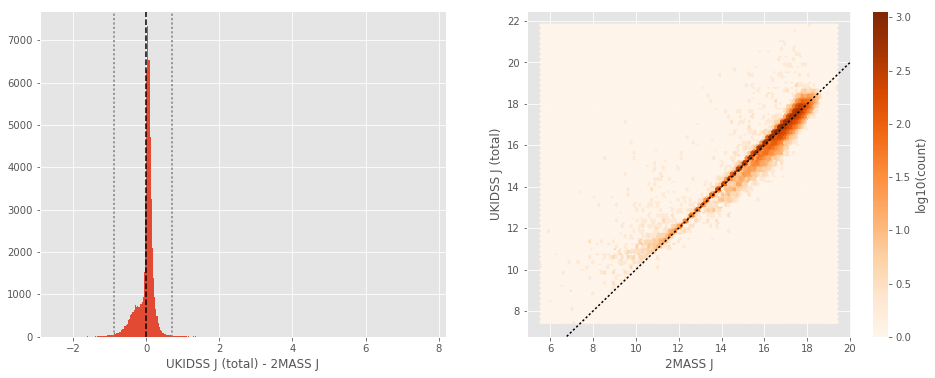

In [14]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.10
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9586393060930751
- 99% percentile: 0.9195574765912466


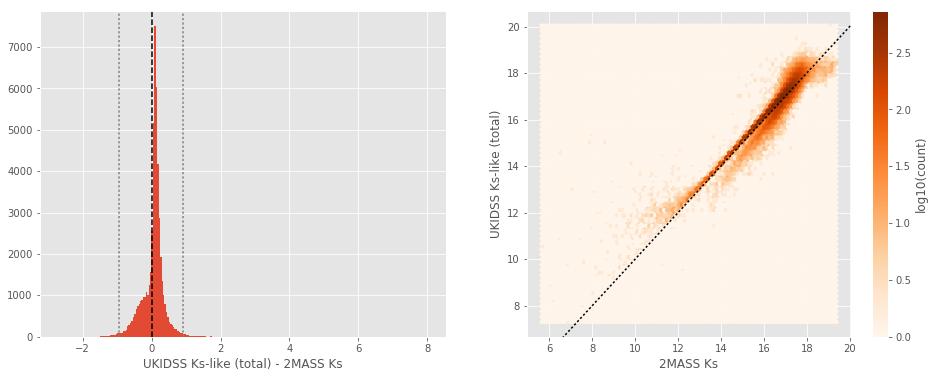

In [15]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 2979508 / 6759591 (44.08%)


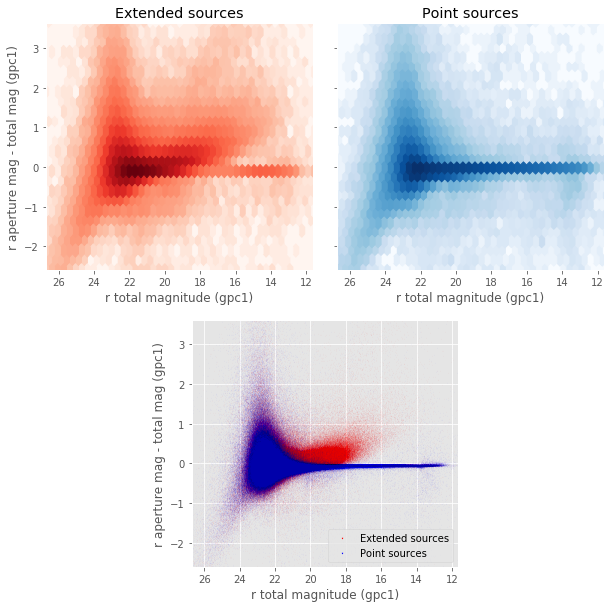

In [16]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (gpc1)", "r aperture mag - total mag (gpc1)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 1076909 / 6759591 (15.93%)


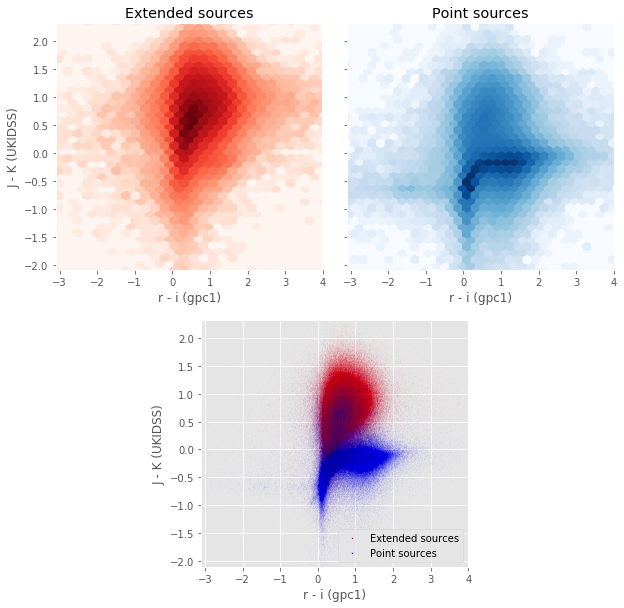

In [17]:
nb_ccplots(
    master_catalogue['m_gpc1_r'] - master_catalogue['m_gpc1_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "r - i (gpc1)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)